In [214]:
%matplotlib notebook

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from utils import normal_distance_eval

## Leader and follower paths

<IPython.core.display.Javascript object>


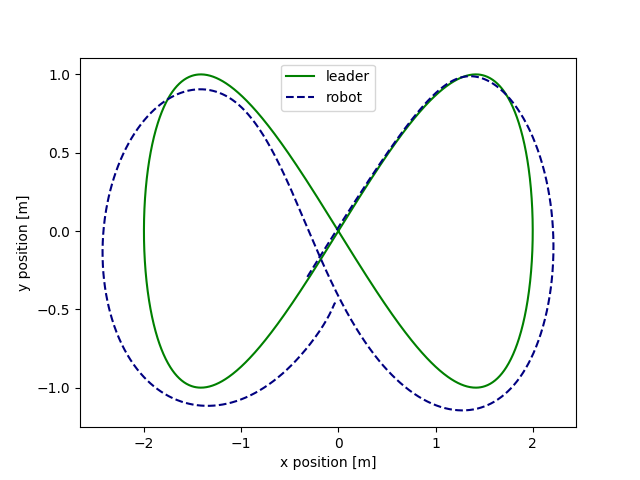

In [218]:
data = pd.read_csv("simulations_records/ft_a2_n1500_cv" + str(cv) + "_cr" + str(cr) + ".csv") 
data['robot_z'] = (data['left_gps_z'] + data['right_gps_z']) / 2
data['robot_x'] = (data['left_gps_x'] + data['left_gps_x']) / 2

plt.xlabel('x position [m]')
plt.ylabel('y position [m]')
plt.plot(data['subject_z'], data['subject_x'], label='leader', color='g')
plt.plot(data['robot_z'], data['robot_x'], label='robot', color='navy', linestyle='--')
plt.legend()
# plt.savefig('destination_path.eps', format='eps')
# plt.show()

## Normal path deviation

In [217]:
params = [(10, 15), (15, 10), (15, 5)]#, (15, 15)]

for cv, cr in params:
    data = pd.read_csv("simulations_records/ft_a2_n1500_cv" + str(cv) + "_cr" + str(cr) + ".csv") 
    data['robot_z'] = (data['left_gps_z'] + data['right_gps_z']) / 2
    data['robot_x'] = (data['left_gps_x'] + data['left_gps_x']) / 2

    rz = np.array(data['robot_z'])
    rx = np.array(data['robot_x'])
    robot_coords = np.array(list(zip(rz, rx)))

    lz = np.array(data['subject_z'])
    lx = np.array(data['subject_x'])
    leader_coords = np.array(list(zip(lz, lx)))

    leader_path_cum_length = [0]

    for i in range(1, len(leader_coords)):
        dist = np.linalg.norm(leader_coords[i] - leader_coords[i-1])
        leader_path_cum_length.append(leader_path_cum_length[i-1] + dist)

    robot_dist_to_leader_path, distance_score = normal_distance_eval(robot_coords, leader_coords)

    plt.plot(leader_path_cum_length, robot_dist_to_leader_path, label='cv=' + str(cv) + ', cα=' + str(cr))
    plt.ylabel('normal path deviation [m]')
    plt.xlabel('leader distance along path [m]')
    plt.xlim((0, 12.15))
    plt.legend()
    print('Total distance to leader:', distance_score)
    
plt.savefig('ft_npd_comparison.eps', format='eps')

Total distance to leader: 256.195906662
Total distance to leader: 117.804765326
Total distance to leader: 301.453432938


# Lemniscates

Generate the trajectory for the leader mathematically using lemniscates

In [8]:
%matplotlib notebook

def plot_lemniscate_animated(ts, xs, ys, xlim = (-1, 1), ylim=(-1, 1)):
    fig,ax = plt.subplots(1,1)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    line, = ax.plot([], [])
    for i in range(len(ts) + 1):
        line.set_xdata(xs[0:i])
        line.set_ydata(ys[0:i])
        fig.canvas.draw()
        
    plt.show()

## Gerono Lemniscate

Generate the values of t ordered in the way that we want the leader to move

In [9]:
def generate_gerono_lemniscate_t(coords_len):
    p1 = np.arange(0, np.pi + 0.000001, (np.pi)/(coords_len/2))
    p2 = np.arange(-np.pi - 0.000001, 0, (np.pi)/(coords_len/2))
#     print(p1)
#     print(p2)
    return np.concatenate((p1, p2))

<IPython.core.display.Javascript object>


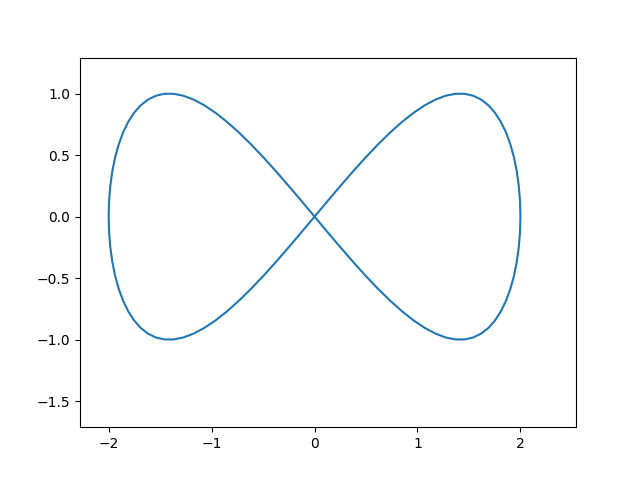

In [10]:
%matplotlib notebook

A = 2
ts = np.array(generate_gerono_lemniscate_t(100))
xs = np.array([A * np.sin(t) for t in ts])
ys = np.array([A * np.sin(t) * np.cos(t) for t in ts])

plot_lemniscate_animated(ts, xs, ys, (-5,5), (-3,3))

In [11]:
generate_gerono_lemniscate_t(4000)[3950]

-0.080111612666730281

In [12]:
A = 2
tp = -0.08011161266673028
print(A * np.sin(tp))
print(A * np.sin(tp) * np.cos(tp))

-0.160051898336
-0.159538576783


## Bernoulli Lemniscate

Generate the values of t ordered in the way that we want the leader to move

In [13]:
def generate_bernoulli_lemniscate_t(coords_len):
    p1 = np.arange(np.pi/2, 0, -(np.pi)/(coords_len/2))
    p2 = np.arange(0, -np.pi, -(np.pi)/(coords_len/2))
    p3 = np.arange(np.pi, np.pi/2 - 0.0001, -(np.pi)/(coords_len/2))
    return np.concatenate((p1, p2, p3))

<IPython.core.display.Javascript object>


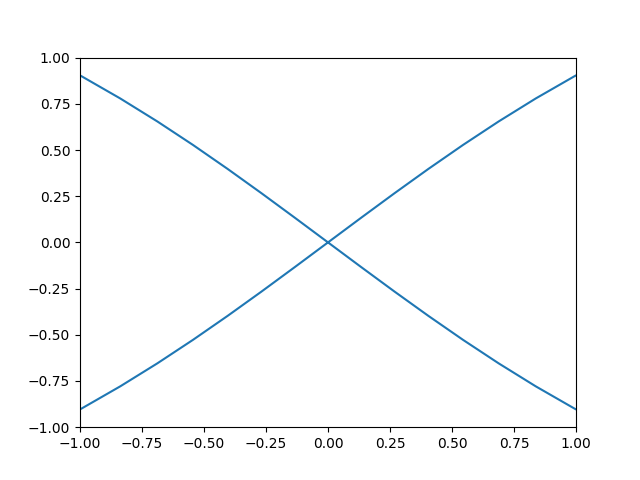

In [14]:
A = 3
ts = np.array(generate_bernoulli_lemniscate_t(100))
xs = np.array([(A * np.sqrt(2) * np.cos(t))/(np.sin(t)**2 + 1) for t in ts])
ys = np.array([(A * np.sqrt(2) * np.cos(t) * np.sin(t)/(np.sin(t)**2 + 1)) for t in ts])

plot_lemniscate_animated(ts, xs, ys)